In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#open and read file from harddrive (csv too big to push to github)
file = "C:/Users/kamer/Desktop/uci_bootcamp_KM/arrest-data-from-2010-to-present_clean.csv"
crime_data = pd.read_csv(file)
#check that it worked
crime_data.head()

,Unnamed: 0,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Charge Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,2,5666570,2019-06-22T00:00:00.000,400.0,15,N Hollywood,1543,31,F,O,...,DRUNK DRIVING ALCOHOL/DRUGS,MAGNOLIA AV,LAUREL CANYON BL,"{'latitude': '34.1649', 'human_address': '{""ad...",8890.0,205.0,1332.0,17.0,5.0,39.0
1,8,5666534,2019-06-22T00:00:00.000,240.0,18,Southeast,1842,20,M,H,...,DRUNK DRIVING ALCOHOL/DRUGS,IMPERIAL,MAIN,"{'latitude': '33.931', 'human_address': '{""add...",24355.0,809.0,1194.0,7.0,15.0,53.0
2,9,5666871,2019-06-22T00:00:00.000,1615.0,12,77th Street,1293,14,M,B,...,MINOR IN POSS OF CONCEALABLE FIREARM/ETC,W 104TH ST,S WESTERN AV,"{'latitude': '33.9419', 'human_address': '{""ad...",23678.0,779.0,1170.0,7.0,14.0,20.0
3,10,5666420,2019-06-22T00:00:00.000,16.0,14,Pacific,1406,35,M,H,...,DRUNK DRIVING ALCOHOL/DRUGS,CULVER BL,MARINA FY,"{'latitude': '34.024', 'human_address': '{""add...",23451.0,880.0,786.0,9.0,6.0,74.0
4,12,5666622,2019-06-22T00:00:00.000,725.0,8,West LA,853,26,M,B,...,DRIVE PRIV SUSPEND/REVKD AFTER PRIOR OFFN,SANTAMONICA BL,BELFORT AV,"{'latitude': '34.0445', 'human_address': '{""ad...",23443.0,861.0,746.0,9.0,10.0,50.0


In [3]:
#get full list of columns so I know which ones I need to reference for my analysis
crime_data.columns

Index(['Unnamed: 0', 'Report ID', 'Arrest Date', 'Time', 'Area ID',
       'Area Name', 'Reporting District', 'Age', 'Sex Code', 'Descent Code',
       'Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Address', 'Cross Street', 'Location',
       'Zip Codes', 'Census Tracts', 'Precinct Boundaries',
       'LA Specific Plans', 'Council Districts',
       'Neighborhood Councils (Certified)'],
      dtype='object')

In [4]:
#Overall Total for each type

#pull relevant columns
types_df = crime_data[['Report ID','Charge Group Description']]
#group by charge description (crime type) to get total count for each type
types_total = types_df.groupby("Charge Group Description").count()
#sort to get the top 5
types_sort = types_total["Report ID"].sort_values()
types_top = types_sort.nlargest(n=5,keep='last')
types_top

Charge Group Description
Miscellaneous Other Violations    44570
Driving Under Influence           29772
Narcotic Drug Laws                25828
Drunkeness                        25016
Moving Traffic Violations         12360
Name: Report ID, dtype: int64

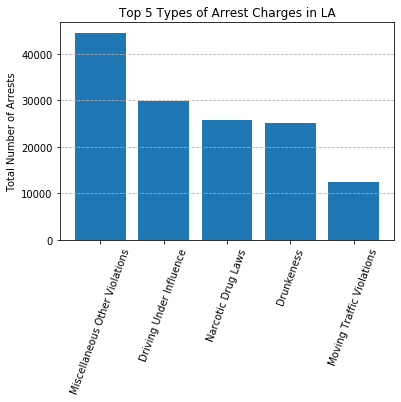

In [5]:
#bar graph for the top 5 types of crime
plt.bar(types_top.index,types_top.values)
plt.grid(axis='y',linestyle="--")
plt.title("Top 5 Types of Arrest Charges in LA")
plt.xticks(rotation=70)
plt.ylabel("Total Number of Arrests")
plt.savefig("Top5_Types.png")
plt.show()

In [6]:
#pull relevant columns to get info on age and charges
demo_data = crime_data[['Report ID','Age','Charge Group Description']]
#check it worked
demo_data.head()

,Report ID,Age,Charge Group Description
0,5666570,31,Driving Under Influence
1,5666534,20,Driving Under Influence
2,5666871,14,Weapon (carry/poss)
3,5666420,35,Driving Under Influence
4,5666622,26,Moving Traffic Violations


In [7]:
#create bins for different age groups
bins = [0, 19, 40, 60, 100]
age_groups = ["under 20","20s to 30s","40s to 50s","60+"]

#create binned df
demo_data["Age Group"] = pd.cut(demo_data['Age'],bins,labels=age_groups)
demo_data

,Report ID,Age,Charge Group Description,Age Group
0,5666570,31,Driving Under Influence,20s to 30s
1,5666534,20,Driving Under Influence,20s to 30s
2,5666871,14,Weapon (carry/poss),under 20
3,5666420,35,Driving Under Influence,20s to 30s
4,5666622,26,Moving Traffic Violations,20s to 30s
...,...,...,...,...
208255,2180467,41,Driving Under Influence,40s to 50s
208256,2180349,16,Vehicle Theft,under 20
208257,2180620,15,Robbery,under 20
208258,101104731,12,Miscellaneous Other Violations,under 20


In [8]:
#get a count of total crimes for each age group
age_total = demo_data.groupby(["Age Group"])
age_total_df = age_total["Report ID"].count()
age_total_df

Age Group
under 20       23286
20s to 30s    113487
40s to 50s     63652
60+             7826
Name: Report ID, dtype: int64

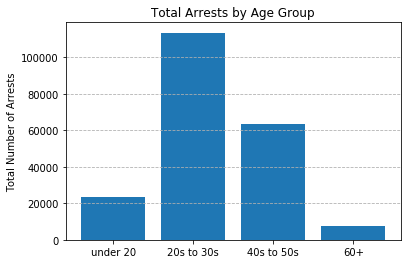

In [9]:
#bar graph for total number of crimes among each age group
plt.bar(age_total_df.index,age_total_df.values)
plt.title("Total Arrests by Age Group")
plt.grid(axis='y',linestyle="--")
plt.ylabel("Total Number of Arrests")
plt.savefig("Total_Arrests_Age_Group.png")
plt.show()

In [10]:
#group by age group and by charge type. Df will show a count of each charge type within each age group
age_df = demo_data.groupby(["Age Group","Charge Group Description"])
binned_age_df = age_df[["Report ID"]].count()
#rename report ID count column to report count
new_age_df = binned_age_df.rename(columns={"Report ID":"Report Count"})
new_age_df.head()

Report Count
Age Group Charge Group Description              
under 20  Against Family/Child              11.0
          Aggravated Assault               775.0
          Burglary                         875.0
          Disorderly Conduct               272.0
          Disturbing the Peace              41.0

In [11]:
#reformat df
rf_age_df = new_age_df.unstack(0)
#change null values to 0 since there are some charge types that did not occur with certain age groups
rf_age_df = rf_age_df.fillna(0)
rf_age_df.head()

Report Count                             
Age Group                    under 20 20s to 30s 40s to 50s    60+
Charge Group Description                                          
Against Family/Child             11.0      270.0      109.0    5.0
Aggravated Assault              775.0     4491.0     1671.0  145.0
Burglary                        875.0     1695.0      456.0   32.0
Disorderly Conduct              272.0     2706.0     2271.0  369.0
Disturbing the Peace             41.0       76.0       45.0    3.0

In [12]:
#Get top 5 charge types for under 20 age group
under_20_df = rf_age_df['Report Count']['under 20'].sort_values()
under_20_top = under_20_df.nlargest(n=5,keep='last')
under_20_top

Charge Group Description
Miscellaneous Other Violations    6454.0
Pre-Delinquency                   2638.0
Robbery                           2190.0
Narcotic Drug Laws                1702.0
Prostitution/Allied               1602.0
Name: under 20, dtype: float64

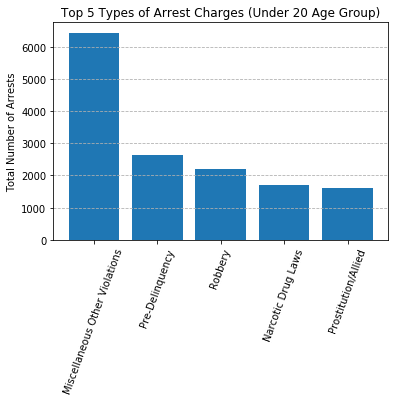

In [13]:
#bar graph for under 20 age group
plt.bar(under_20_top.index,under_20_top.values)
plt.title("Top 5 Types of Arrest Charges (Under 20 Age Group)")
plt.xticks(rotation=70)
plt.grid(axis="y",linestyle="--")
plt.ylabel("Total Number of Arrests")
plt.savefig("Top5_under20.png")
plt.show()

In [14]:
#Get top 5 charge types for 20s-30s age group
twentytothirty_df = rf_age_df['Report Count']['20s to 30s'].sort_values()
twentytothirty_top = twentytothirty_df.nlargest(n=5,keep='last')
twentytothirty_top

Charge Group Description
Miscellaneous Other Violations    22053.0
Driving Under Influence           19422.0
Narcotic Drug Laws                14573.0
Drunkeness                         8529.0
Moving Traffic Violations          8465.0
Name: 20s to 30s, dtype: float64

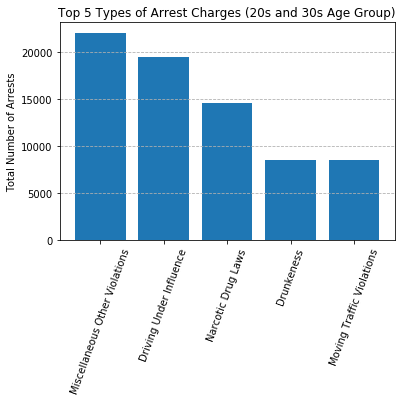

In [15]:
#bar graph for 20s-30s
plt.bar(twentytothirty_top.index,twentytothirty_top.values)
plt.title("Top 5 Types of Arrest Charges (20s and 30s Age Group)")
plt.xticks(rotation=70)
plt.grid(axis="y",linestyle="--")
plt.ylabel("Total Number of Arrests")
plt.savefig("Top5_20s30s.png")
plt.show()

In [16]:
#Get top 5 charges for 40s-50s
fortytofifty_df = rf_age_df['Report Count']['40s to 50s'].sort_values()
fortytofifty_top = fortytofifty_df.nlargest(n=5,keep='last')
fortytofifty_top

Charge Group Description
Miscellaneous Other Violations    14390.0
Drunkeness                        13835.0
Narcotic Drug Laws                 8699.0
Driving Under Influence            8614.0
Liquor Laws                        3888.0
Name: 40s to 50s, dtype: float64

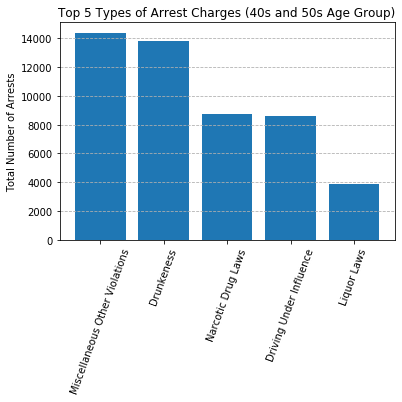

In [17]:
#bar graph for 40s-50s
plt.bar(fortytofifty_top.index,fortytofifty_top.values)
plt.title("Top 5 Types of Arrest Charges (40s and 50s Age Group)")
plt.xticks(rotation=70)
plt.grid(axis="y",linestyle="--")
plt.ylabel("Total Number of Arrests")
plt.savefig("Top5_40s50s.png")
plt.show()

In [18]:
#get top 5 charges for 60+
sixtyplus_df = rf_age_df['Report Count']['60+'].sort_values()
sixtyplus_top = sixtyplus_df.nlargest(n=5,keep='last')
sixtyplus_top

Charge Group Description
Drunkeness                        2311.0
Miscellaneous Other Violations    1671.0
Driving Under Influence           1057.0
Narcotic Drug Laws                 854.0
Liquor Laws                        522.0
Name: 60+, dtype: float64

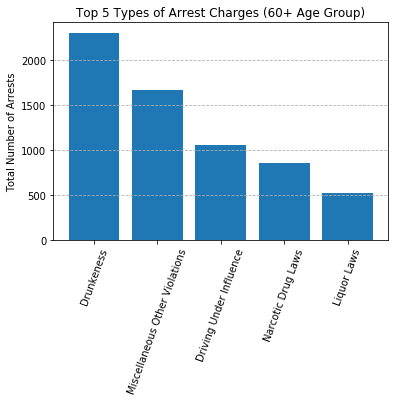

In [19]:
#bar graph for 60+
plt.bar(sixtyplus_top.index,sixtyplus_top.values)
plt.title("Top 5 Types of Arrest Charges (60+ Age Group)")
plt.xticks(rotation=70)
plt.grid(axis="y",linestyle="--")
plt.ylabel("Total Number of Arrests")
plt.savefig("Top5_60plus.png")
plt.show()

In [20]:
#grab relevant columns for sex and charges
demo_sex_data = crime_data[['Report ID','Sex Code','Charge Group Description']]
demo_sex_data.head()

,Report ID,Sex Code,Charge Group Description
0,5666570,F,Driving Under Influence
1,5666534,M,Driving Under Influence
2,5666871,M,Weapon (carry/poss)
3,5666420,M,Driving Under Influence
4,5666622,M,Moving Traffic Violations


In [21]:
#group by sex and charge type to get a count of each charge type made under each sex
sex_code = demo_sex_data.groupby(["Sex Code","Charge Group Description"])
sex_groupby = sex_code.count()
#reformatting
rf_sex_df = sex_groupby.unstack(0)
rf_sex_df.head()

Report ID      
Sex Code                         F     M
Charge Group Description                
Against Family/Child            66   329
Aggravated Assault            1347  5735
Burglary                       422  2636
Disorderly Conduct            1569  4049
Disturbing the Peace            31   134

In [22]:
#get top 5 charges among females
female_df = rf_sex_df['Report ID']['F'].sort_values()
female_top_df = female_df.nlargest(n=5,keep='last')
female_top_df

Charge Group Description
Prostitution/Allied               6858
Driving Under Influence           6239
Miscellaneous Other Violations    6152
Narcotic Drug Laws                4552
Drunkeness                        2906
Name: F, dtype: int64

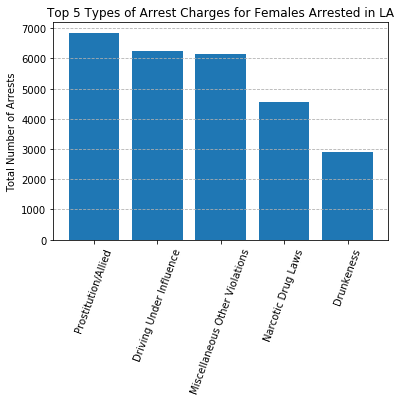

In [23]:
#bar chart for females
plt.bar(female_top_df.index,female_top_df.values)
plt.xticks(rotation=70)
plt.title("Top 5 Types of Arrest Charges for Females Arrested in LA")
plt.grid(axis='y',linestyle="--")
plt.ylabel("Total Number of Arrests")
plt.savefig("Top5_females.png")
plt.show()

In [24]:
#get top 5 charges for males
male_df = rf_sex_df['Report ID']['M'].sort_values()
male_top_df = male_df.nlargest(n=5,keep='last')
male_top_df

Charge Group Description
Miscellaneous Other Violations    38418
Driving Under Influence           23533
Drunkeness                        22110
Narcotic Drug Laws                21276
Moving Traffic Violations         10830
Name: M, dtype: int64

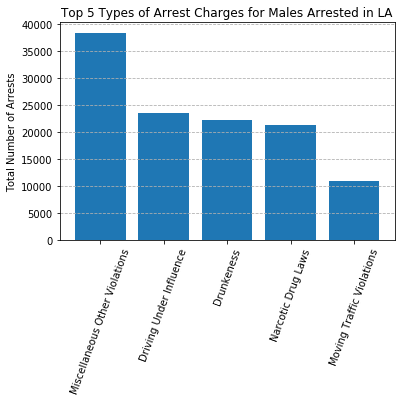

In [25]:
#bar chart for males
plt.bar(male_top_df.index,male_top_df.values)
plt.xticks(rotation=70)
plt.title("Top 5 Types of Arrest Charges for Males Arrested in LA")
plt.grid(axis='y',linestyle="--")
plt.ylabel("Total Number of Arrests")
plt.savefig("Top5_males.png")
plt.show()